# La evolución del nacimiento/defunción en España desde 2013 a 2021

Importamos bibliotecas necesarias:  
- pandas: para realizar los análisis de las bases de datos
- numpy: para trabajar con matrices
- matplotlib.pyplot: para trabajar con gráficas

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Importamos las bases de datos provenientes de la INE:

In [2]:
#DataFrame de nacimientos
dataFrameNac = pd.read_csv('../Nacimientos/nacimientos.csv', delimiter=';', encoding='latin1')

#DataFrame de defunciones
dataFrameDef = pd.read_csv('../Defunciones/defunciones.csv')

Realizamos las referencias a los datos:

In [3]:
#Eje x
año = dataFrameDef['PERIODO'] 

#Eje y
nacimientos = dataFrameNac['Total']
defunciones = dataFrameDef['VALOR'] 

Creamos la gráfica Curva Def/Nac:

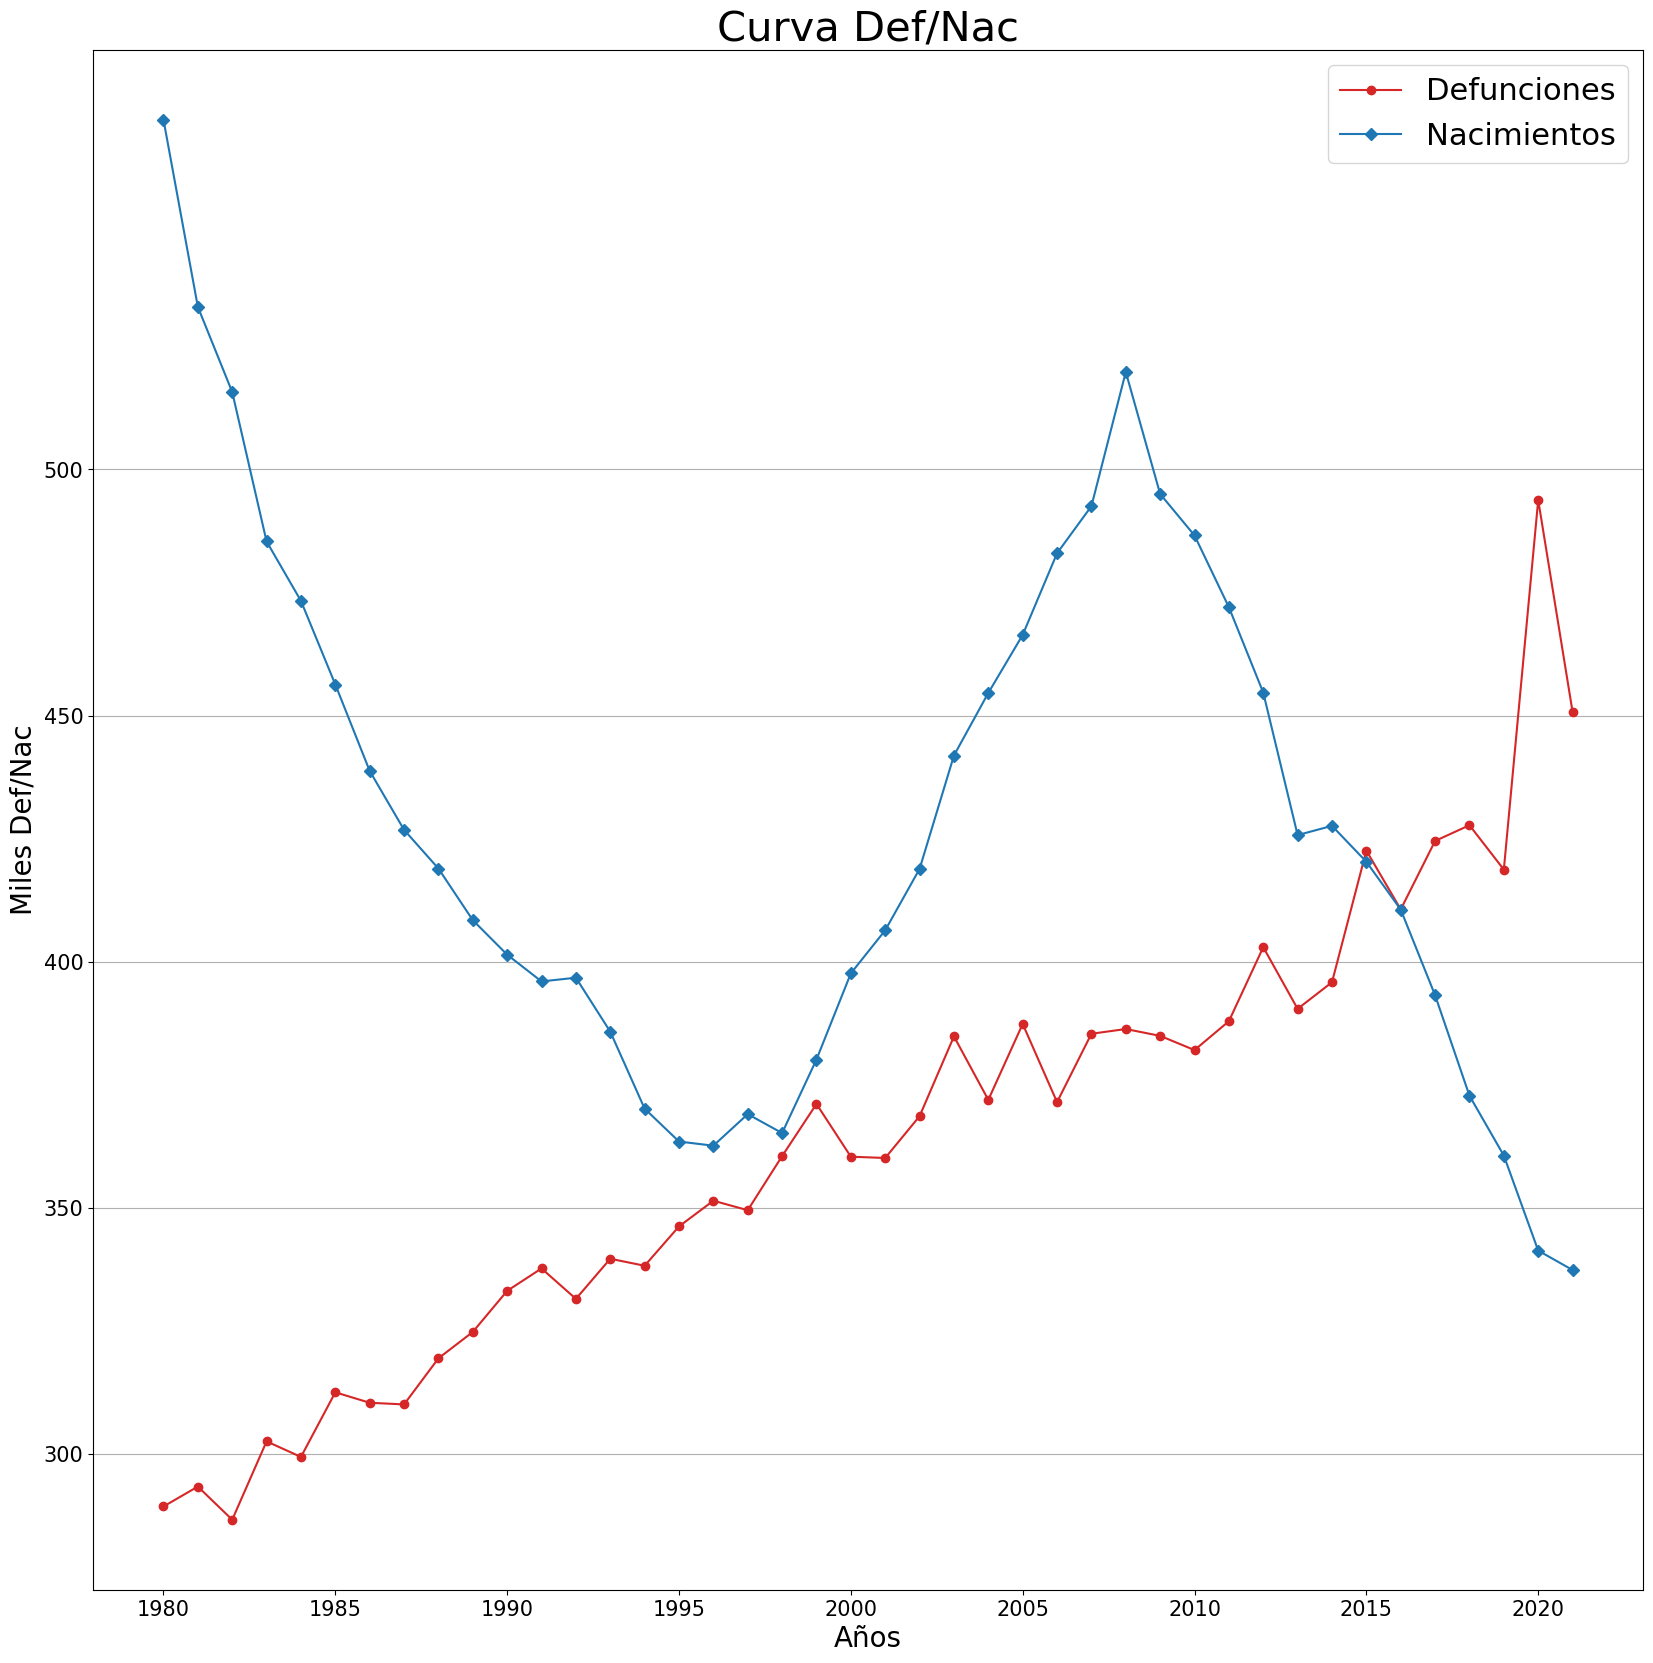

In [4]:
#Gráfica
fig, ax = plt.subplots(figsize=(20,20)) 

ax.set_title('Curva Def/Nac',fontsize=30) 

ax.set_xlabel('Años', fontsize=20) 

ax.set_ylabel('Miles Def/Nac',fontsize=20) 

plt.xticks(np.arange(1980,2021,5),fontsize=15) 

plt.yticks(np.arange(0,501,50),fontsize=15) 

ax.plot(año,defunciones, marker='o', color='tab:red') 
ax.plot(año,nacimientos,marker='D')

#Leyenda
ax.legend(['Defunciones','Nacimientos'], fontsize=22)
ax.grid(axis='y')

None 

Creación de los datos de balances:

In [5]:
#Lista de defunciones
listaDef = []
for index, row in dataFrameDef.iterrows():
    listaDef.append(row['VALOR'])

#Lista de nacimientos
listaNac = []
for index, row in dataFrameNac.iterrows():
    listaNac.append(row['Total'])

#Lista de balance (nacimientos-defunciones)
listaBalance = []
for index in range(len(listaNac)):
    listaBalance.append(listaNac[index]-listaDef[index])

Creamos la gráfica Balance Def/Nac:

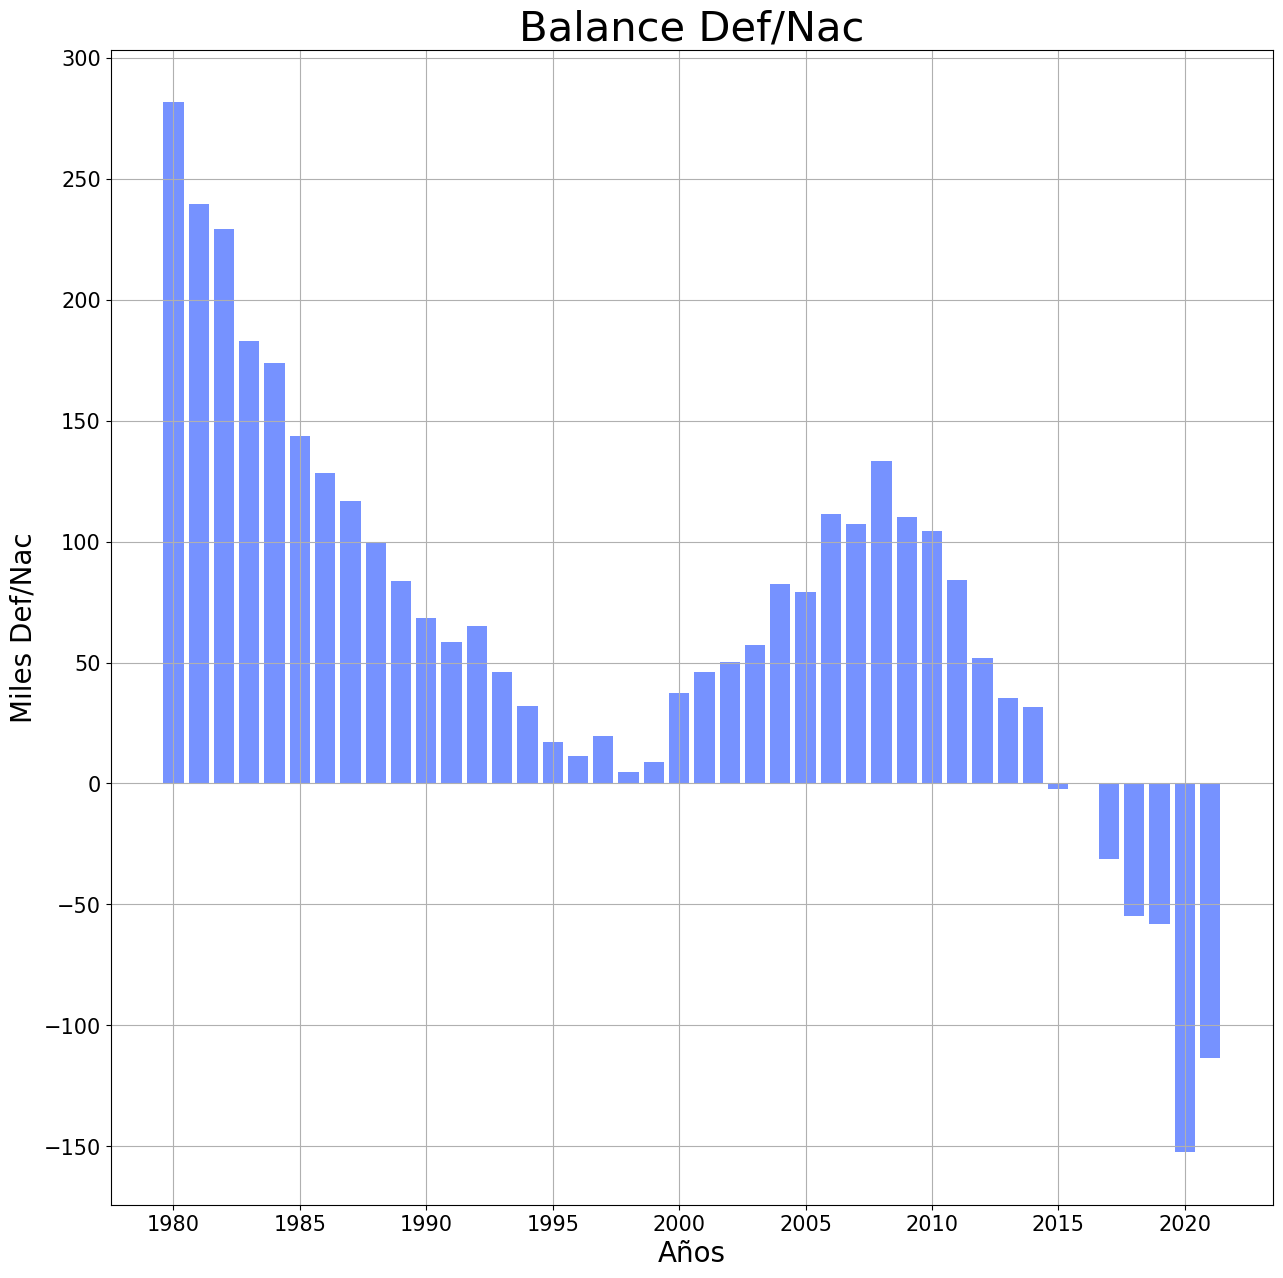

In [6]:
fig, ax = plt.subplots(figsize=(15,15))

ax.bar(año,listaBalance, color='#7692ff')

plt.xticks(np.arange(1980,2021,5),fontsize=15)
plt.yticks(np.arange(-150,301,50),fontsize=15)

ax.grid()

ax.set_title('Balance Def/Nac',fontsize=30) 
ax.set_xlabel('Años', fontsize=20) 
ax.set_ylabel('Miles Def/Nac',fontsize=20)

None

Creamos un dataframe con el número de nacimientos por defuncion:

In [7]:
serieNacDef = dataFrameNac['Total'] / dataFrameDef['VALOR']
dataframeNacDef = serieNacDef.to_frame(name='NacDef')

dataframeNacDef.set_index(año, inplace=True)

dataframeNacDef = dataframeNacDef.sort_index(ascending=True)

dataframeNacDef.to_csv('NacDef.csv')

PROBANDO HOLA INMUNDO